In [1]:
from dotenv import load_dotenv
load_dotenv()
import scllm as sl
import scanpy as sc
from langchain_openai import ChatOpenAI

# Annotate cell types

In this tutorial we will use Chat GPT to annotate cell types.

In [2]:
pbmc = sc.datasets.pbmc3k_processed()

In [3]:
openai_model = "gpt-4o-mini"
llm = ChatOpenAI(temperature=0.0, model=openai_model)

In [4]:
pbmc

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
sc.tl.leiden(pbmc, flavor="igraph", n_iterations=2)

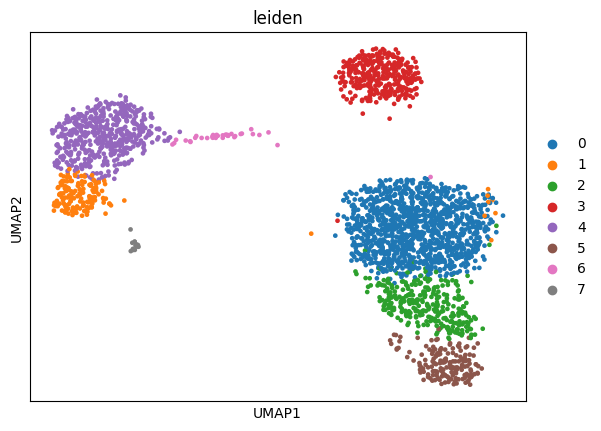

In [6]:
sc.pl.umap(pbmc, color='leiden')

To annotate the cells we simply use the `annotate_cluster` function. This will iterate through each cluster and try to determine the most likely cell types.

In [ ]:
res = sl.tl.annotate_cluster(llm, pbmc, cluster_key='leiden', use_raw=True, top_genes=15)

In [9]:
pbmc

[CellType(cell_type='T cell', confidence=0.95, marker_genes=['CD3D', 'CD3E', 'LTB', 'RPS27', 'RPS25', 'RPS12', 'RPL31', 'RPS29', 'RPL30', 'RPL9', 'RPS3', 'RPS6', 'MALAT1']),
 CellType(cell_type='B cell', confidence=0.95, marker_genes=['CD74', 'HLA-DRA', 'HLA-DPB1', 'CD79A', 'CD79B', 'HLA-DRB1', 'HLA-DPA1', 'HLA-DQA1', 'MS4A1', 'HLA-DQB1', 'CD37', 'HLA-DRB5', 'TCL1A', 'VPREB3']),
 CellType(cell_type='Monocyte/Macrophage', confidence=0.95, marker_genes=['LYZ', 'TYROBP', 'S100A9', 'CST3', 'S100A8', 'AIF1', 'FCN1']),
 CellType(cell_type='Cytotoxic T Cell', confidence=0.95, marker_genes=['NKG7', 'GZMB', 'GNLY', 'CTSW', 'CST7', 'PRF1', 'GZMA', 'HLA-C', 'B2M', 'CD247', 'FCGR3A', 'HLA-A', 'GZMM']),
 CellType(cell_type='CD8+ T cell', confidence=0.95, marker_genes=['CCL5', 'NKG7', 'IL32', 'GZMA', 'CST7', 'CTSW', 'GZMK', 'CD3D', 'B2M', 'PTPRCAP', 'HLA-C', 'LYAR', 'CD8A', 'GZMM', 'HLA-A']),
 CellType(cell_type='Monocyte/Macrophage', confidence=0.85, marker_genes=['LST1', 'AIF1', 'FTH1', 'FCER1G', 

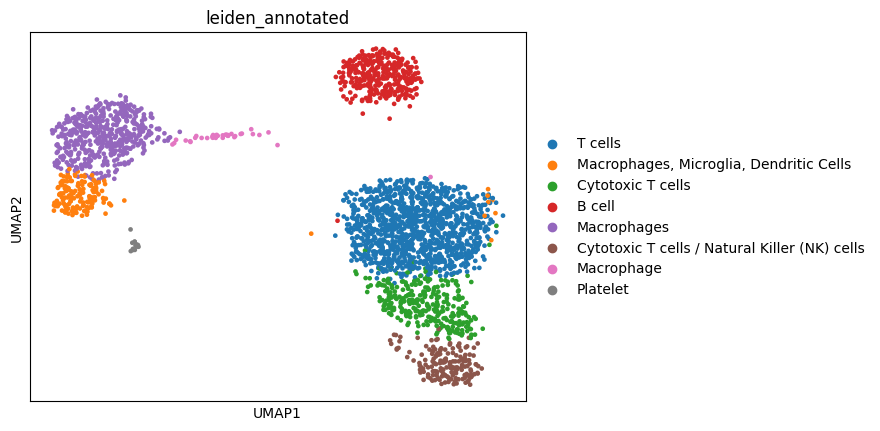

In [19]:
sc.pl.umap(pbmc, color='leiden_annotated')